In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from collections import Counter
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels import api as sm

In [2]:
def arima_custom(i=None,j=None,best_param=None,best_param_seasonal=None):
    print('Product_ID : ',i,'  ','Country : ',j)
    mod = sm.tsa.statespace.SARIMAX(train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds']).set_index('ds')[['y']],
                                            order=best_param,
                                            seasonal_order=best_param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

    results = mod.fit()
    
    pred_uc = results.get_forecast(steps=test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].shape[0])

    # Get confidence intervals of forecasts
    pred_ci = pred_uc.conf_int()
    forecast = pred_uc.predicted_mean

    df = test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['ds'])
    df['y'] = np.round(forecast.values,2)
    train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds']).set_index('ds')['y'].plot(figsize=(20,10))

    df.sort_values(['ds']).set_index('ds')['y'].plot(figsize=(20,10))
    plt.show()
    
    print(results.summary().tables[1])
    results.plot_diagnostics(figsize=(15, 12))
    plt.show()    

In [3]:
def arima_investigate(i=None,j=None):

    print('Product_ID : ',i,'  ','Country : ',j)
    # Define the p, d and q parameters to take any value between 0 and 2
    p = d = q = range(0, 4)

    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    # print('Examples of parameter combinations for Seasonal ARIMA...')
    # print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
    # print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
    # print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
    # print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

    warnings.filterwarnings("ignore") # specify to ignore warning messages
    best_param, best_param_seasonal,best_aic = None,None,999999999999999999
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds']).set_index('ds')[['y']],
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                if results.aic<best_aic:
                    best_aic = results.aic
                    best_param = param
                    best_param_seasonal = param_seasonal
                    print('Current best ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                    
                    pred_uc = results.get_forecast(steps=test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].shape[0])

                    # Get confidence intervals of forecasts
                    pred_ci = pred_uc.conf_int()
                    forecast = pred_uc.predicted_mean

                    df = test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['ds'])
                    df['y'] = np.round(forecast.values,2)
                    train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds']).set_index('ds')['y'].plot(figsize=(20,10))

                    df.sort_values(['ds']).set_index('ds')['y'].plot(figsize=(20,10))
                    plt.show()        
            except:
                continue



In [4]:
def investigate(i=None,j=None):
    print('Product_ID : ',i,'  ','Country : ',j)
    
    decomposition = sm.tsa.seasonal_decompose(train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds']).set_index('ds')['y'], model='additive')
    fig = decomposition.plot()
    plt.show()

    
    model = ExponentialSmoothing(np.asarray(train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds']).set_index('ds')[['y']].values)
                                 ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
    forecast = model.forecast(test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].shape[0])

    df = test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['ds'])
    df['y'] = np.round(forecast,2)
    train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds']).set_index('ds')['y'].plot(figsize=(20,10))

    df.sort_values(['ds']).set_index('ds')['y'].plot(figsize=(20,10))
    plt.show()

In [5]:
def calculate_arima_for(i=None,j=None,best_param=None,best_param_seasonal=None):
    result = pd.DataFrame()

    print('Product_ID : ',i,'  ','Country : ',j)
    mod = sm.tsa.statespace.SARIMAX(train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds']).set_index('ds')[['y']],
                                            order=best_param,
                                            seasonal_order=best_param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

    results = mod.fit()

    pred_uc = results.get_forecast(steps=test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].shape[0])

    # Get confidence intervals of forecasts
    pred_ci = pred_uc.conf_int()
    forecast = pred_uc.predicted_mean

    df = test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['ds'])
    df['y'] = np.round(forecast.values,2)

    result['S_No'] = df['S_No'].values
    result['y'] = df['y'].values

    return result

In [6]:
train_visual = pd.read_csv('Data/yds_train2018.csv')
test_visual = pd.read_csv('Data/yds_test2018.csv')

train_visual = train_visual.groupby(['Year','Month','Product_ID','Country'],as_index=False).agg({'Sales':'sum'})

test_visual['Sales'] = 0

train_visual['Year'] = train_visual['Year'].apply(lambda x : str(x))
train_visual['Month'] = train_visual['Month'].apply(lambda x : str(x))

test_visual['Year'] = test_visual['Year'].apply(lambda x : str(x))
test_visual['Month'] = test_visual['Month'].apply(lambda x : str(x))

train_visual['date'] = pd.to_datetime(train_visual['Year']+'-'+train_visual['Month']+'-'+str(1))
test_visual['date'] = pd.to_datetime(test_visual['Year']+'-'+test_visual['Month']+'-'+str(1))

train_visual.rename(columns={'Sales':'y','date':'ds'},inplace=True)
test_visual.rename(columns={'Sales':'y','date':'ds'},inplace=True)

In [7]:
import warnings
import itertools
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


In [128]:
# After investigating from EDA, following seems to be the optimal parameters for the 
# seasonal ARIMA with respective product in a given country

# arima_custom(i=1,j='Argentina',best_param=(1, 0, 0),best_param_seasonal=(0, 1, 0, 12))
# arima_custom(i=1,j='Columbia',best_param=(0,1,0),best_param_seasonal=(1,1,0,12))
# arima_custom(i=2,j='Argentina',best_param=(1,1,1),best_param_seasonal=(1,1,0,12))
# arima_custom(i=2,j='Columbia',best_param=(1,0,1),best_param_seasonal=(1,1,0,12))
# arima_custom(i=2,j='Denmark',best_param=(1,1,1),best_param_seasonal=(1,1,0,12))
# arima_custom(i=2,j='Belgium',best_param=(1,1,0),best_param_seasonal=(1,1,0,12))
# arima_custom(i=3,j='Argentina',best_param=(0, 0, 0),best_param_seasonal=(0, 1, 0, 12))
# arima_custom(i=3,j='Columbia',best_param=(0,1,0),best_param_seasonal=(1,1,0,12))
# arima_custom(i=4,j='England',best_param=(1,1,1),best_param_seasonal=(1,1,0,12))
# arima_custom(i=4,j='Finland',best_param=(0, 0, 0),best_param_seasonal=(0, 1, 0, 12))
# arima_custom(i=5,j='England',best_param=(0,1,1),best_param_seasonal=(1,1,0,12))


In [141]:
# arima_custom(i=1,j='Argentina',best_param=(1, 0, 0),best_param_seasonal=(0, 1, 0, 12))


In [103]:
res = calculate_arima_for(i=1,j='Argentina',best_param=(1, 0, 0),best_param_seasonal=(0, 1, 0, 12))
res = pd.concat([res,calculate_arima_for(i=1,j='Columbia',best_param=(0,1,0),best_param_seasonal=(1,1,0,12))],0)
res = pd.concat([res,calculate_arima_for(i=2,j='Argentina',best_param=(1,1,1),best_param_seasonal=(1,1,0,12))],0)
res = pd.concat([res,calculate_arima_for(i=2,j='Columbia',best_param=(1,0,1),best_param_seasonal=(1,1,0,12))],0)
res = pd.concat([res,calculate_arima_for(i=2,j='Denmark',best_param=(1,1,1),best_param_seasonal=(1,1,0,12))],0)
res = pd.concat([res,calculate_arima_for(i=2,j='Belgium',best_param=(1,1,0),best_param_seasonal=(1,1,0,12))],0)
res = pd.concat([res,calculate_arima_for(i=3,j='Argentina',best_param=(0,0,0),best_param_seasonal=(0,1,0,12))],0)
res = pd.concat([res,calculate_arima_for(i=3,j='Columbia',best_param=(0,1,0),best_param_seasonal=(1,1,0,12))],0)
res = pd.concat([res,calculate_arima_for(i=4,j='England',best_param=(1,1,1),best_param_seasonal=(1,1,0,12))],0)
res = pd.concat([res,calculate_arima_for(i=4,j='Finland',best_param=(0,0,0),best_param_seasonal=(0,1,0,12))],0)
res = pd.concat([res,calculate_arima_for(i=5,j='England',best_param=(0,1,1),best_param_seasonal=(1,1,0,12))],0)


Product_ID :  1    Country :  Argentina
Product_ID :  1    Country :  Columbia
Product_ID :  2    Country :  Argentina
Product_ID :  2    Country :  Columbia
Product_ID :  2    Country :  Denmark
Product_ID :  2    Country :  Belgium
Product_ID :  3    Country :  Argentina
Product_ID :  3    Country :  Columbia
Product_ID :  4    Country :  England
Product_ID :  4    Country :  Finland
Product_ID :  5    Country :  England


In [104]:
res.shape

(105, 2)

In [105]:
res.head()

,S_No,y
0,79073,13747359.66
1,79074,15541777.61
2,79075,23011880.52
3,79076,15568539.91
4,79077,7465996.50


In [114]:
sub = pd.read_csv('Data/yds_test2018.csv')

In [115]:
sub.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


In [116]:
sub = sub.merge(right=res,on='S_No',how='left')
sub.drop(['Sales'],1,inplace=True)
sub.rename(columns={'y':'Sales'},inplace=True)
sub.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,13747359.66
1,79074,2016,5,1,Argentina,15541777.61
2,79075,2016,6,1,Argentina,23011880.52
3,79076,2016,7,1,Argentina,15568539.91
4,79077,2016,8,1,Argentina,7465996.50


<h1>Averaging</h1>

In [117]:
# sub.to_csv('ARIMA_best_params.csv',index=False)

In [2]:
holt = pd.read_csv('holt_winters_best.csv')

In [119]:
holt['Sales_arima'] = sub['Sales']

In [120]:
holt[['Sales','Sales_arima']].corr()

,Sales,Sales_arima
Sales,1.000000,0.997645
Sales_arima,0.997645,1.000000


In [142]:
# sub['Sales'] = (sub['Sales']+holt['Sales']) / 2
# sub.to_csv('ARIMA_holt_mean.csv',index=False)

In [121]:
holt.head()

,S_No,Year,Month,Product_ID,Country,Sales,Sales_arima
0,79073,2016,4,1,Argentina,14649924.76,13747359.66
1,79074,2016,5,1,Argentina,16244242.77,15541777.61
2,79075,2016,6,1,Argentina,17631621.80,23011880.52
3,79076,2016,7,1,Argentina,13912307.23,15568539.91
4,79077,2016,8,1,Argentina,10529398.95,7465996.50


In [130]:
train_visual.head()

,Year,Month,Product_ID,Country,y,ds
0,2013,1,1,Argentina,34346025.00,2013-01-01
1,2013,1,1,Columbia,3947356.31,2013-01-01
2,2013,1,2,Argentina,2751851.48,2013-01-01
3,2013,1,2,Belgium,314850.13,2013-01-01
4,2013,1,2,Columbia,2885137.06,2013-01-01


In [133]:
test_visual['y_arima'] = sub['Sales']
test_visual['y_holt_winter'] = holt['Sales']
test_visual.head()

,S_No,Year,Month,Product_ID,Country,y,ds,y_arima,y_holt_winter
0,79073,2016,4,1,Argentina,0,2016-04-01,13747359.66,14649924.76
1,79074,2016,5,1,Argentina,0,2016-05-01,15541777.61,16244242.77
2,79075,2016,6,1,Argentina,0,2016-06-01,23011880.52,17631621.80
3,79076,2016,7,1,Argentina,0,2016-07-01,15568539.91,13912307.23
4,79077,2016,8,1,Argentina,0,2016-08-01,7465996.50,10529398.95


Product_ID :  1    Country :  Argentina


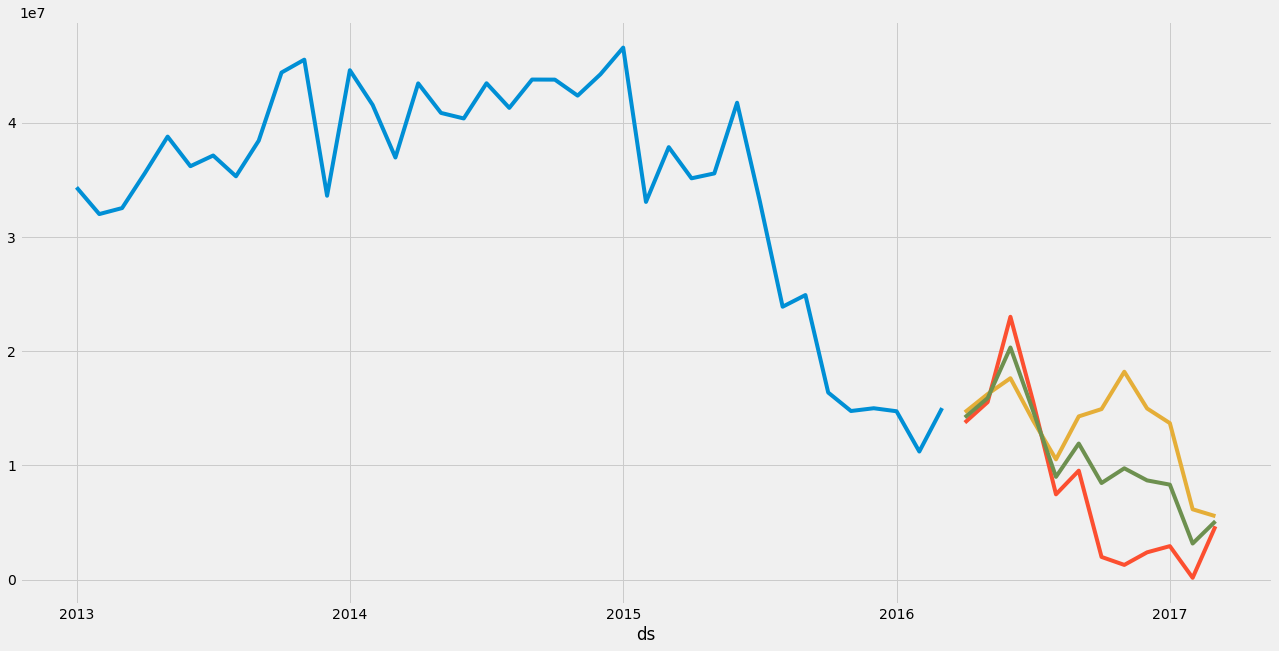

Product_ID :  1    Country :  Columbia


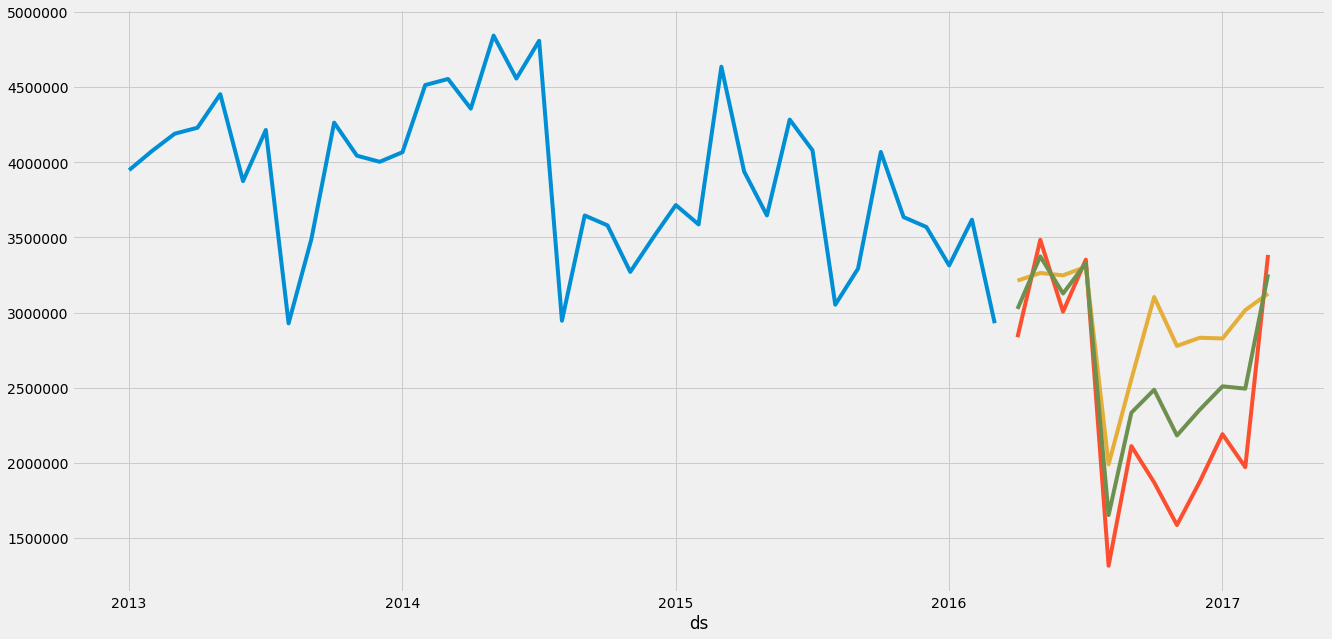

Product_ID :  2    Country :  Columbia


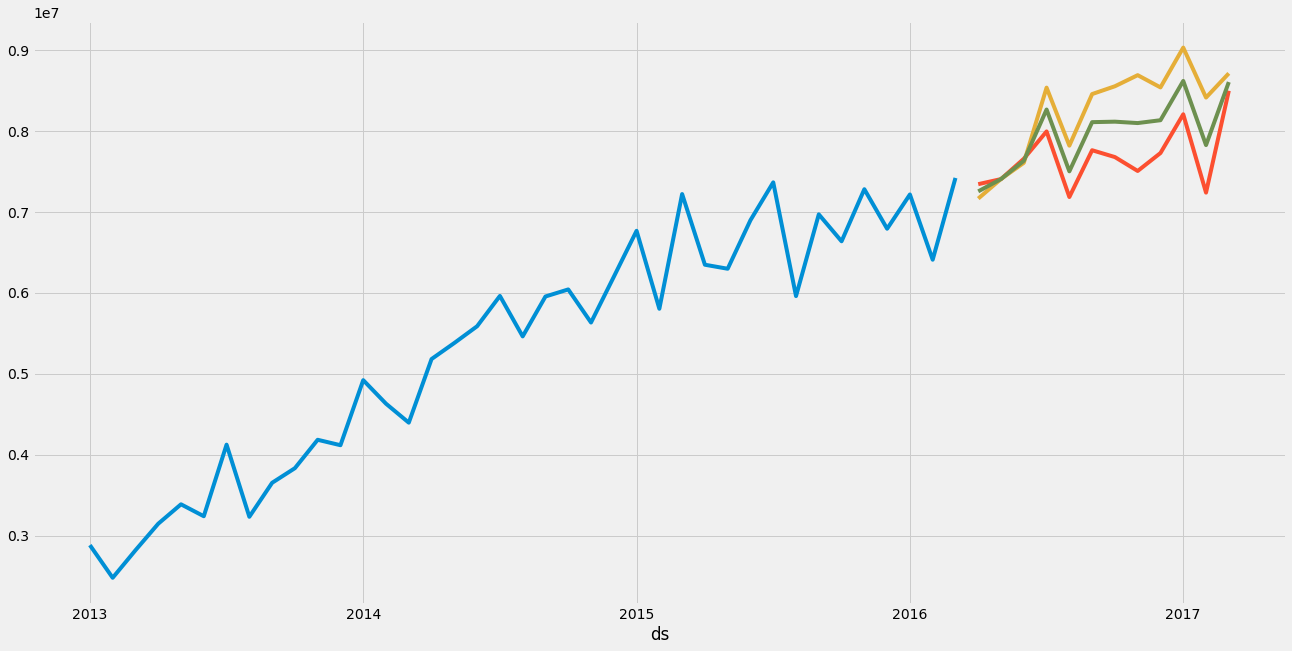

Product_ID :  2    Country :  Denmark


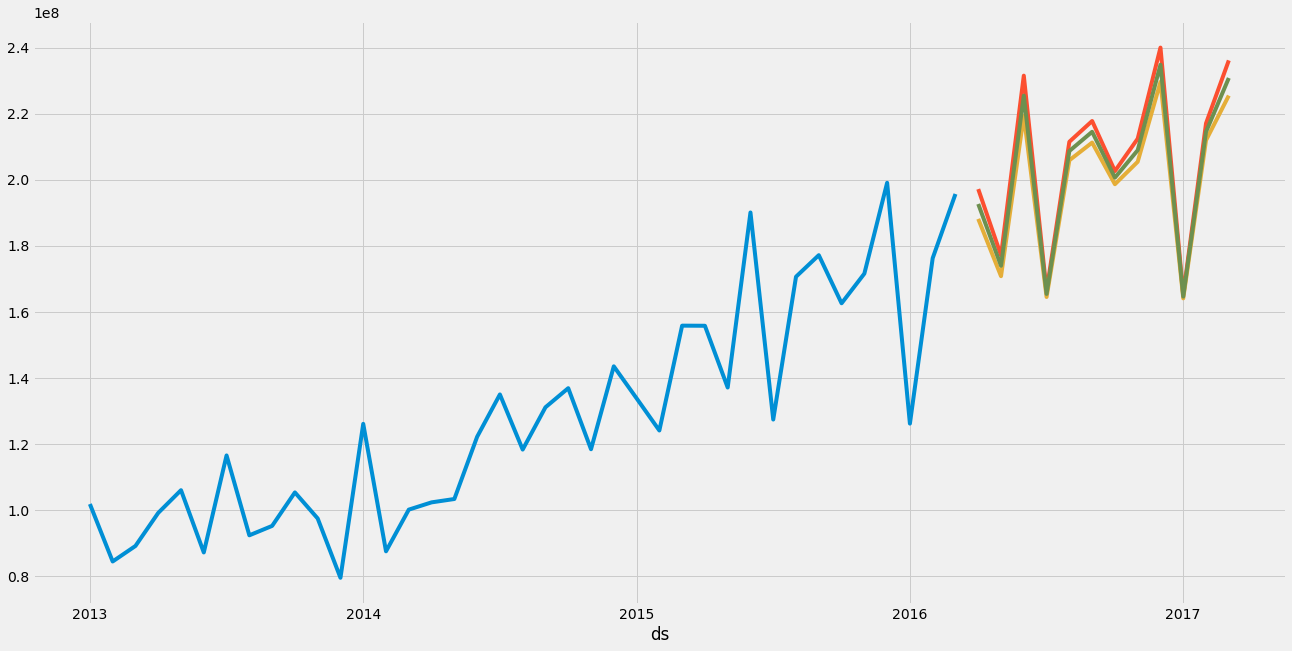

Product_ID :  2    Country :  Argentina


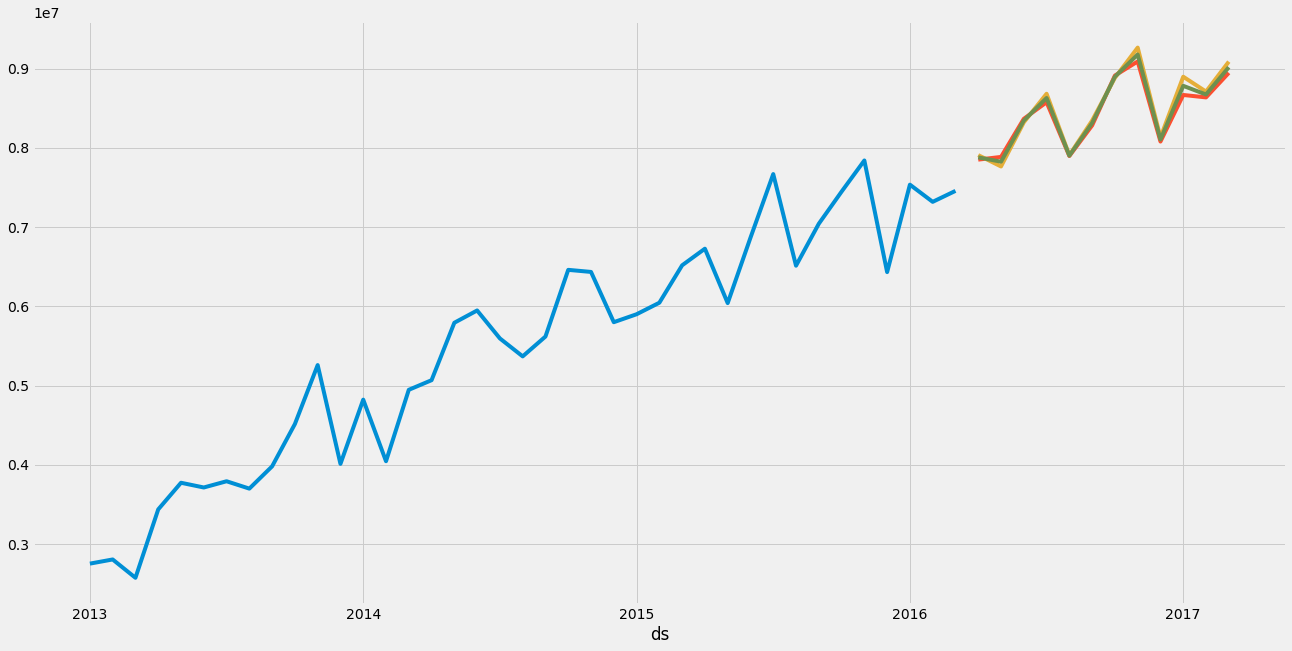

Product_ID :  2    Country :  Belgium


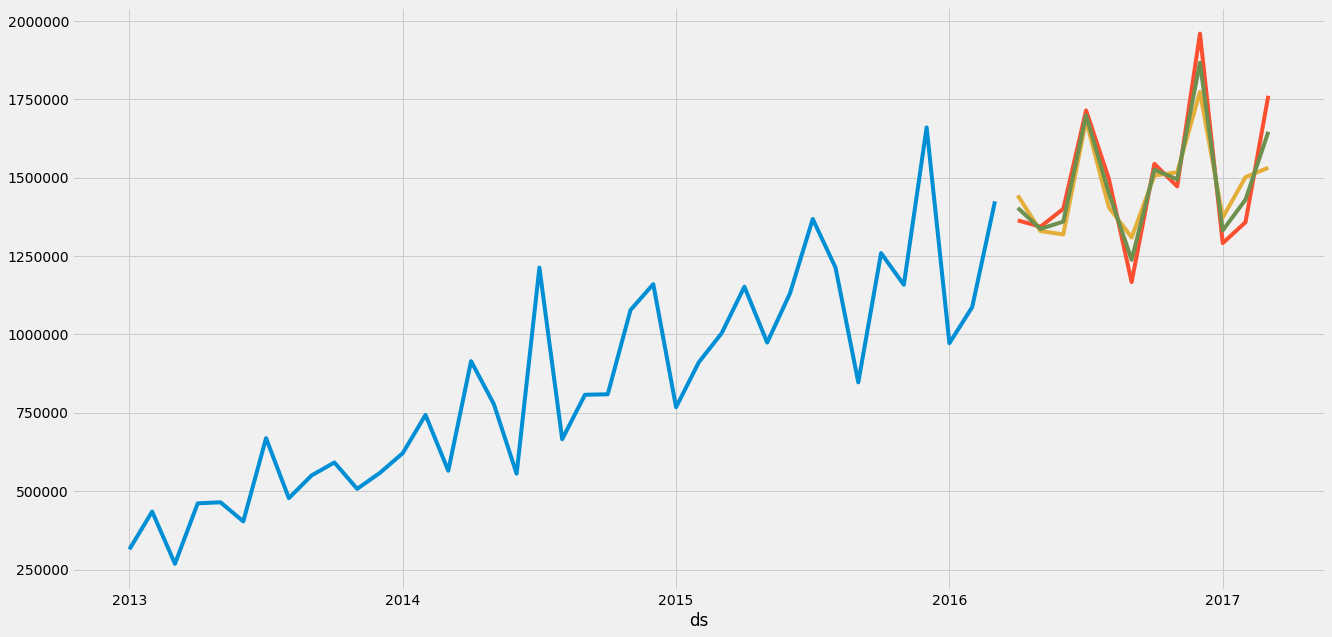

Product_ID :  3    Country :  Argentina


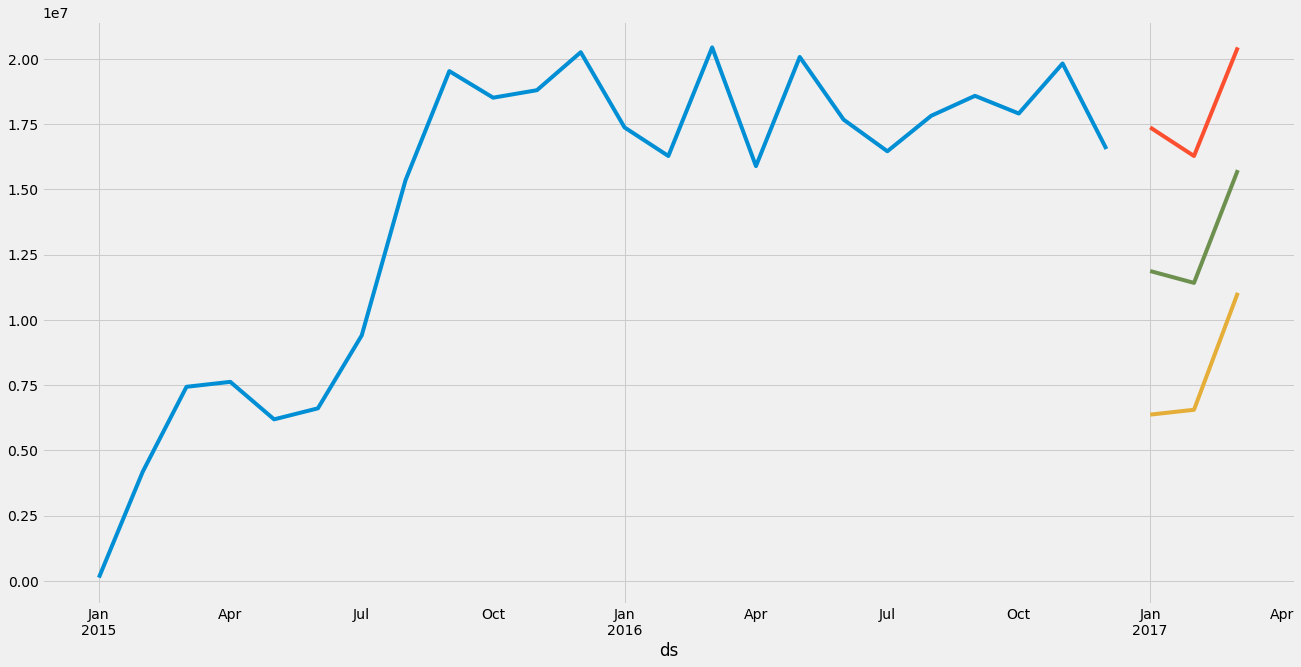

Product_ID :  3    Country :  Columbia


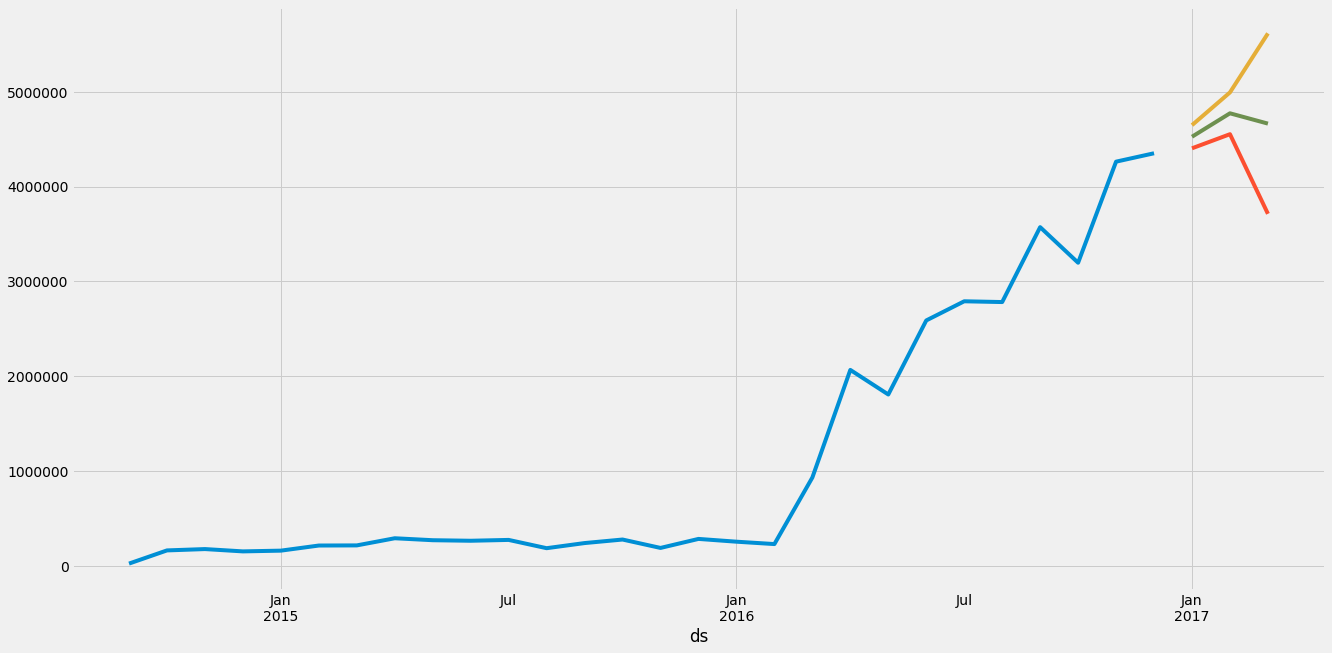

Product_ID :  4    Country :  England


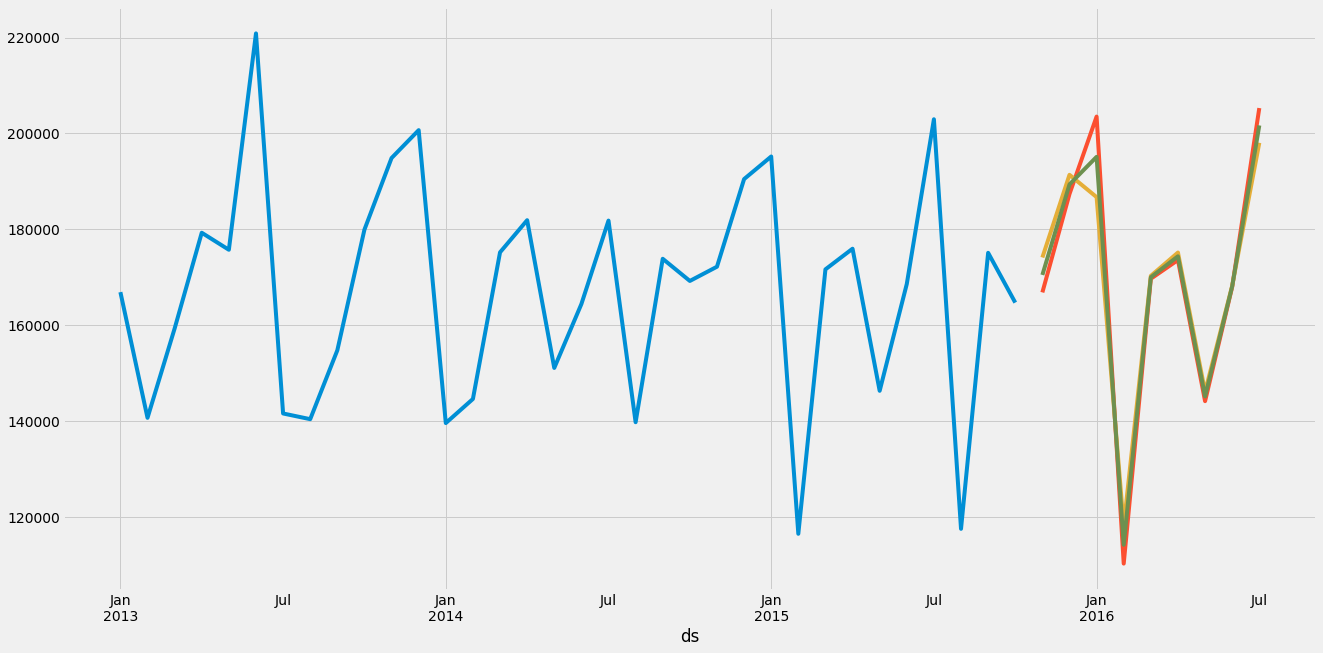

Product_ID :  4    Country :  Finland


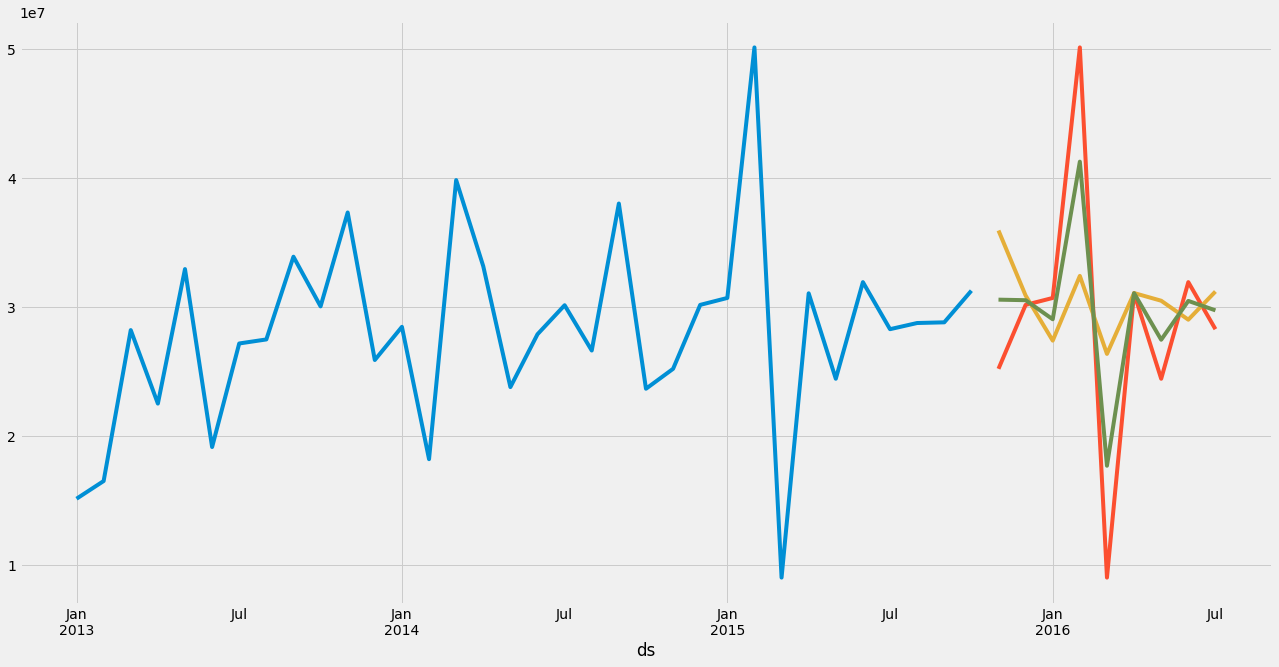

Product_ID :  5    Country :  England


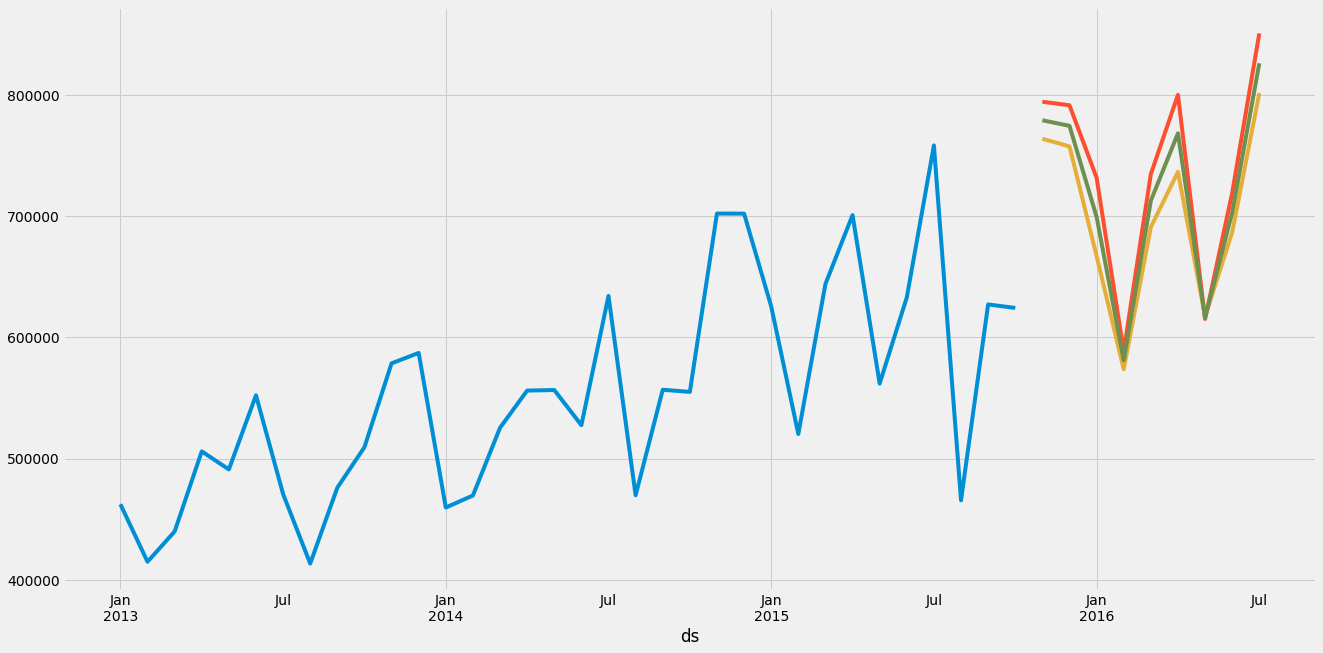

In [136]:
for i in range(1,len(set(train_visual['Product_ID']))+1):
    tmp = list(set(train_visual[train_visual['Product_ID']==i]['Country']))
    for j in tmp:
        print('Product_ID : ',i,'  ','Country : ',j)
        train_visual[(train_visual['Product_ID']==i)&(train_visual['Country']==j)].sort_values(['ds']).set_index('ds')['y'].plot(figsize=(20,10))

        test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['ds']).set_index('ds')['y_arima'].plot(figsize=(20,10))
        test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['ds']).set_index('ds')['y_holt_winter'].plot(figsize=(20,10))
        ((test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['ds']).set_index('ds')['y_arima'] + test_visual[(test_visual['Product_ID']==i)&(test_visual['Country']==j)].sort_values(['ds']).set_index('ds')['y_holt_winter'])/2).plot(figsize=(20,10))
         
        plt.show()

Product_ID :  1    Country :  Argentina
Product_ID :  1    Country :  Argentina


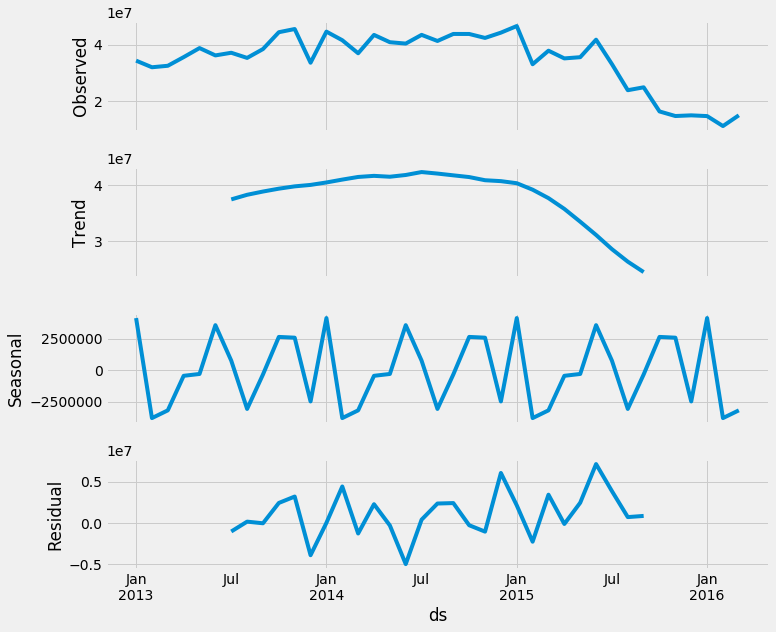

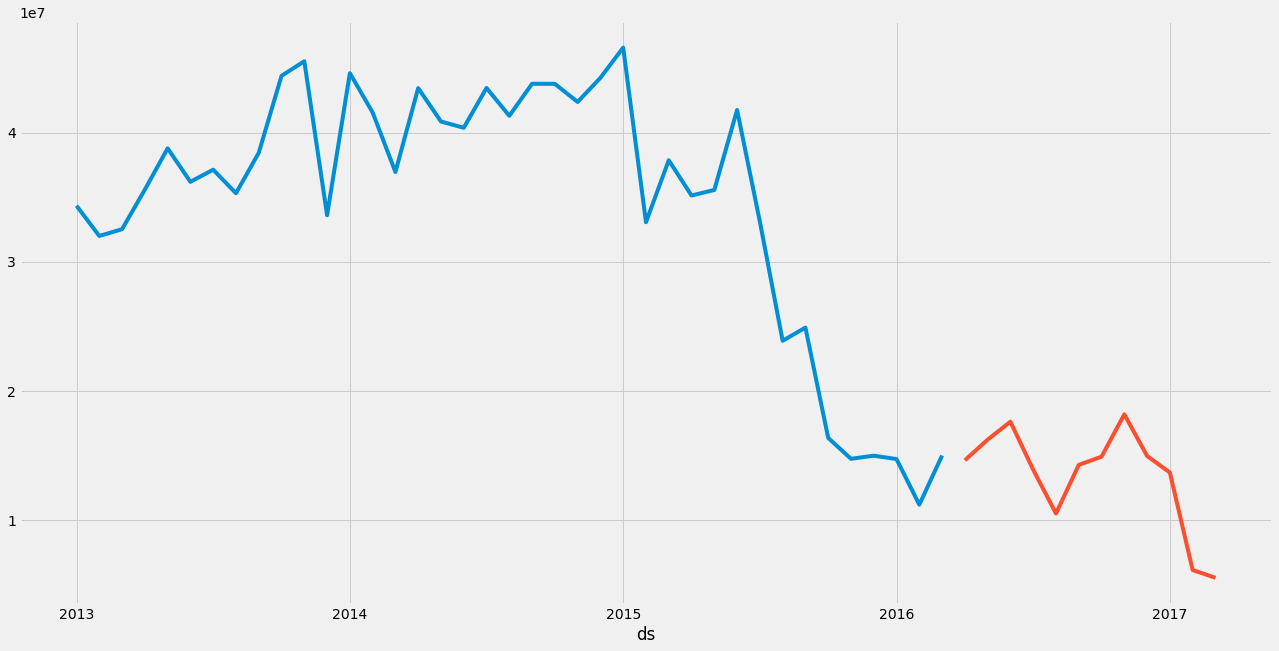

Product_ID :  1    Country :  Columbia
Product_ID :  1    Country :  Columbia


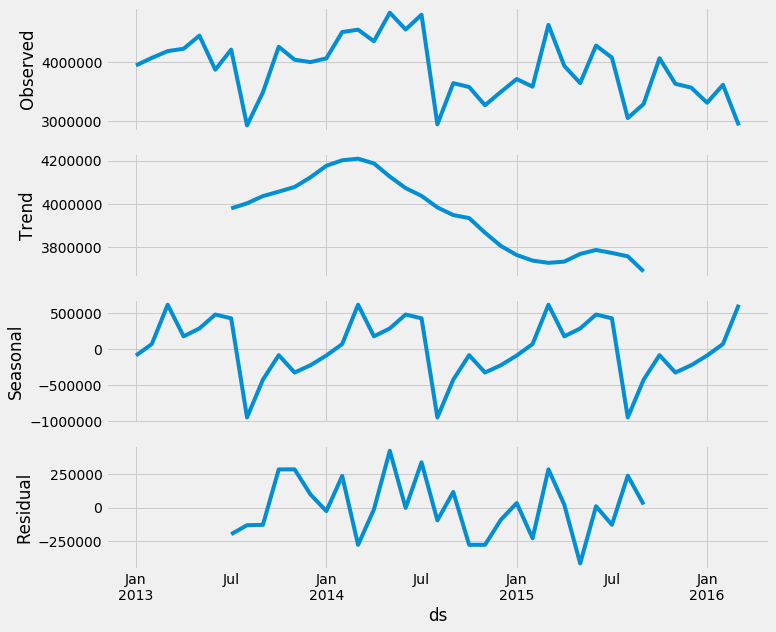

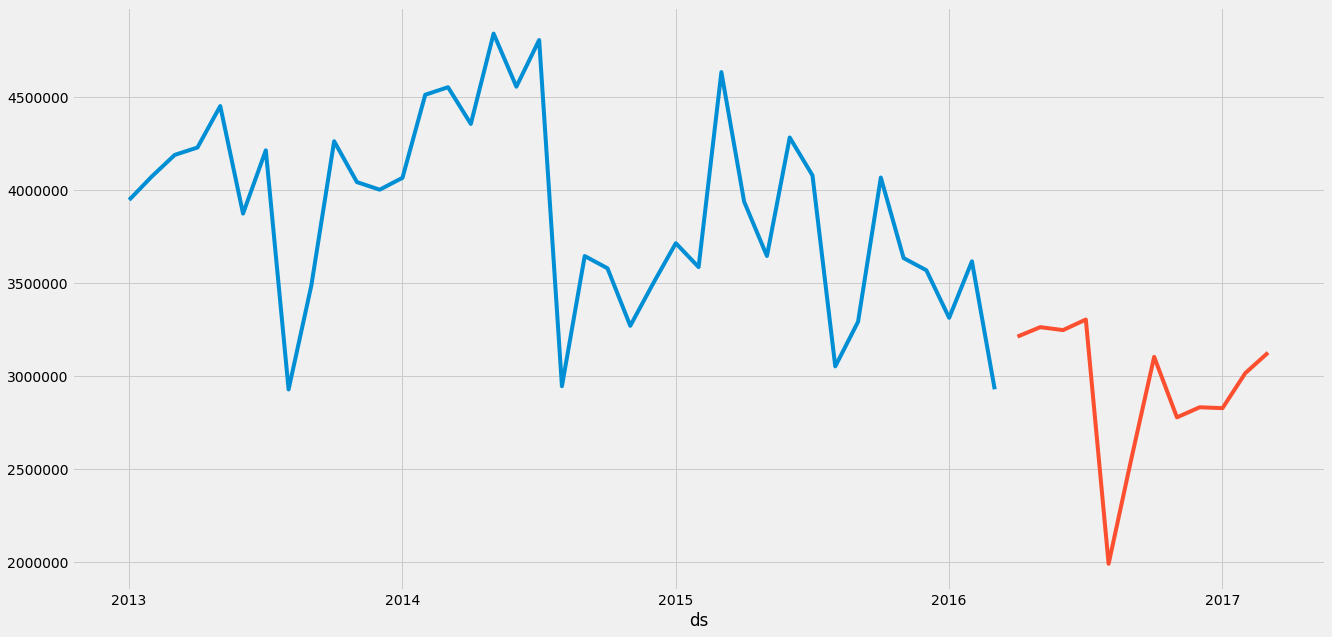

Product_ID :  2    Country :  Columbia
Product_ID :  2    Country :  Columbia


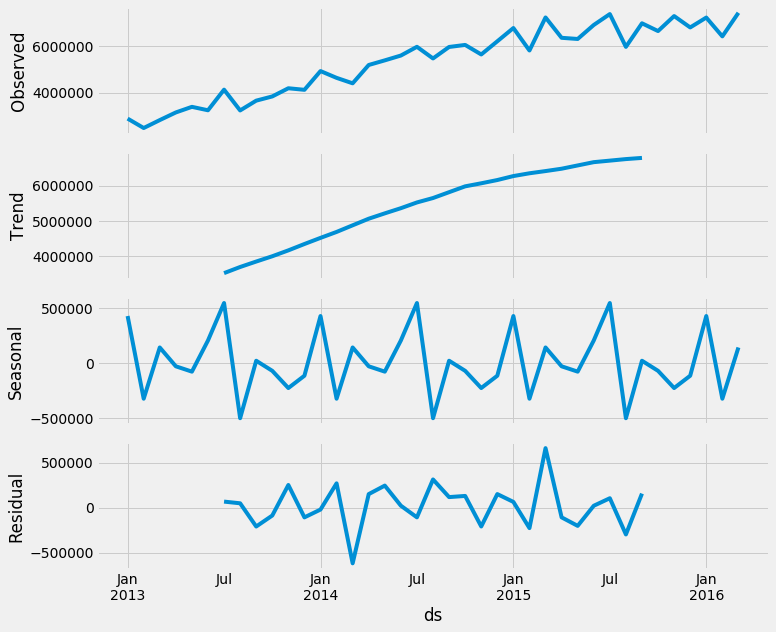

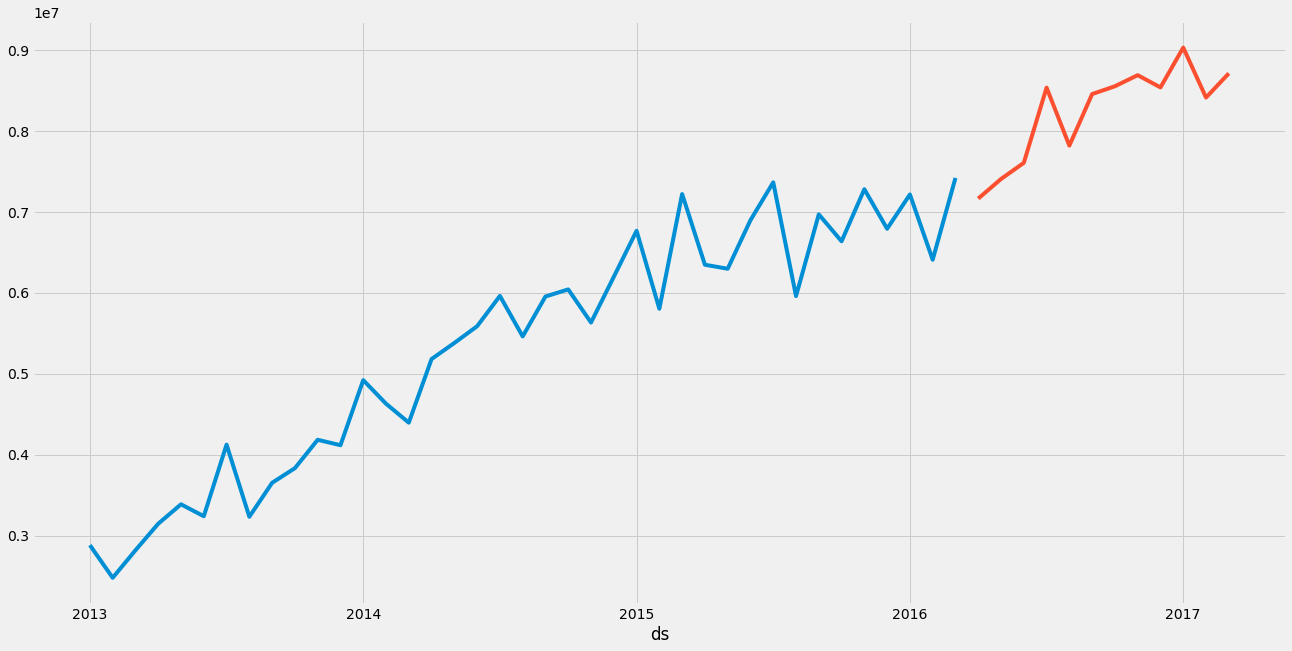

Product_ID :  2    Country :  Denmark
Product_ID :  2    Country :  Denmark


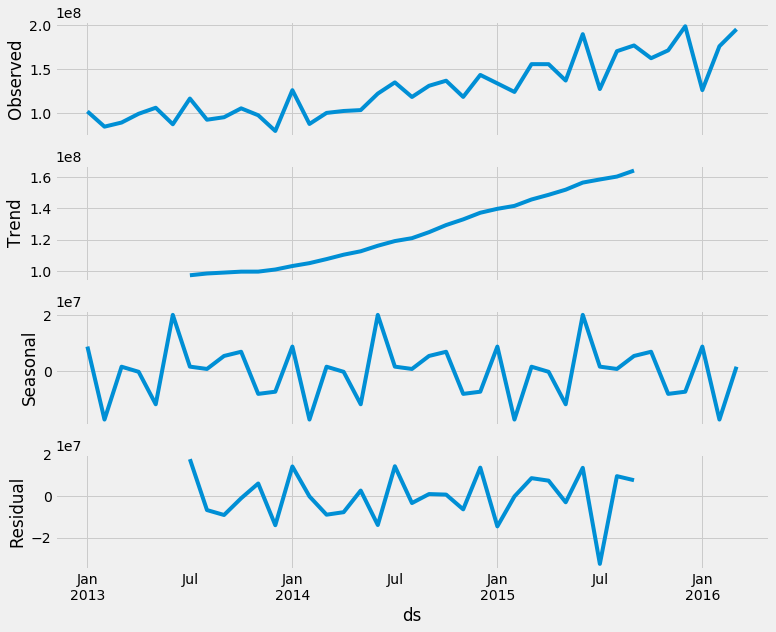

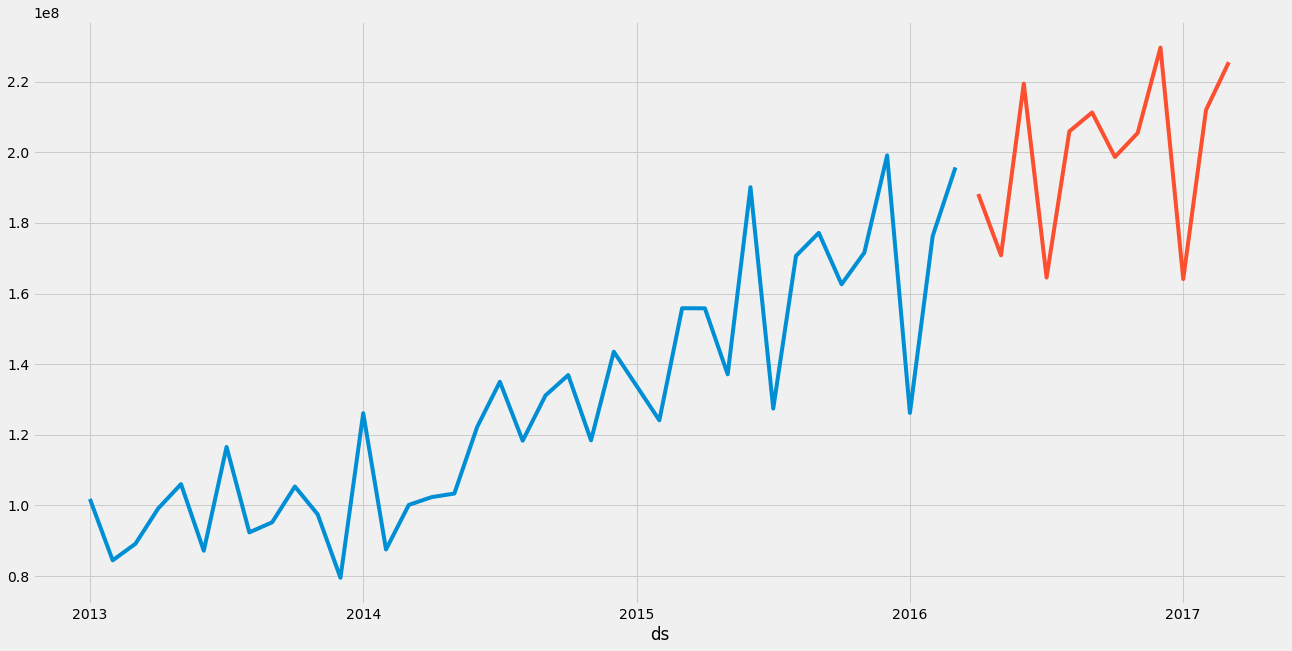

Product_ID :  2    Country :  Argentina
Product_ID :  2    Country :  Argentina


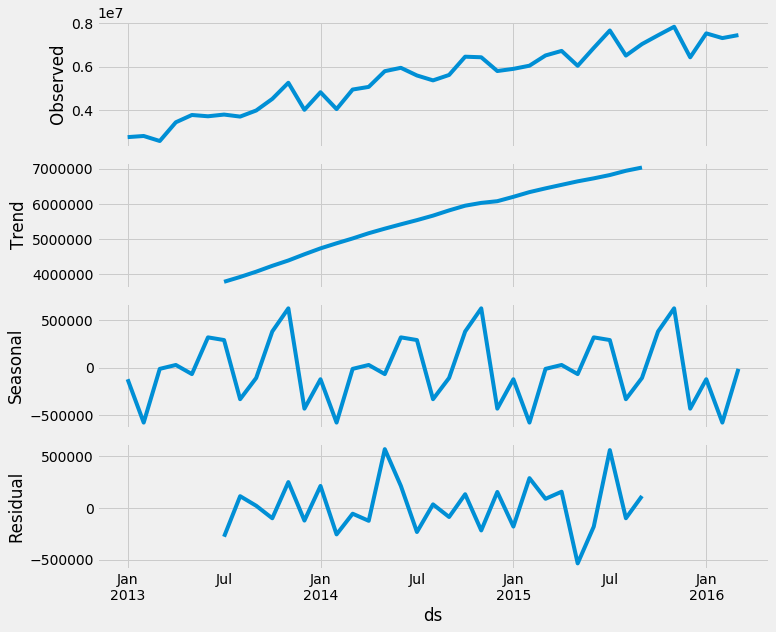

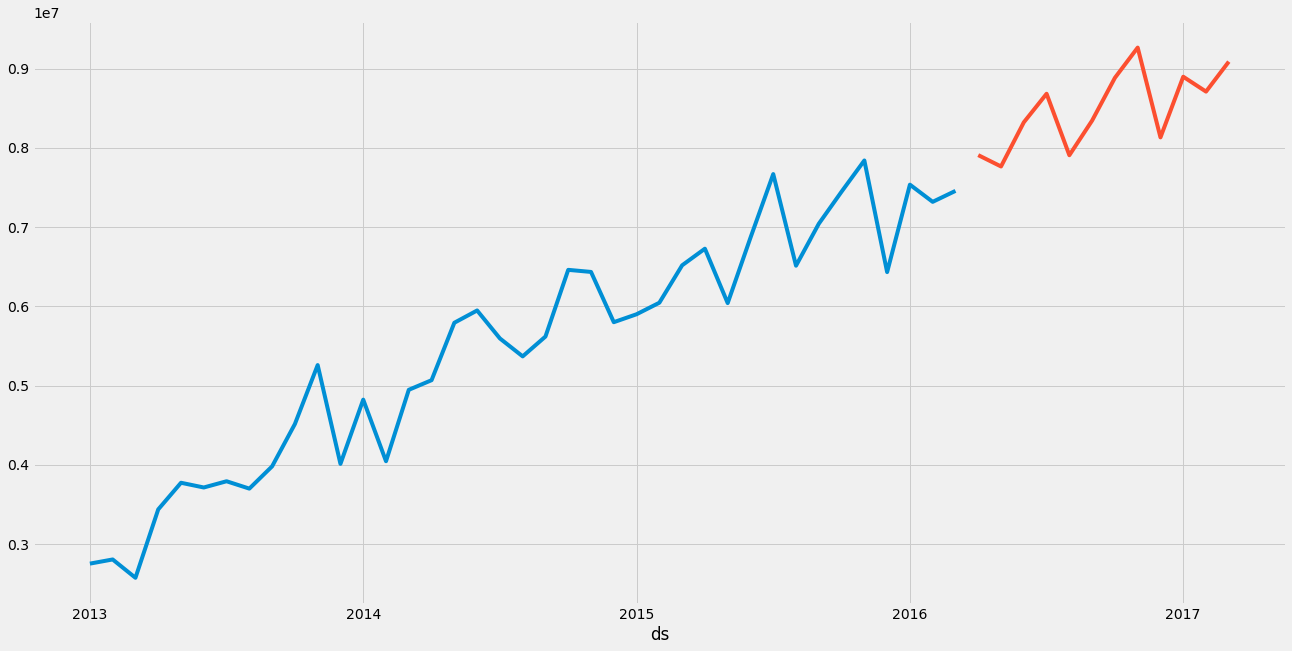

Product_ID :  2    Country :  Belgium
Product_ID :  2    Country :  Belgium


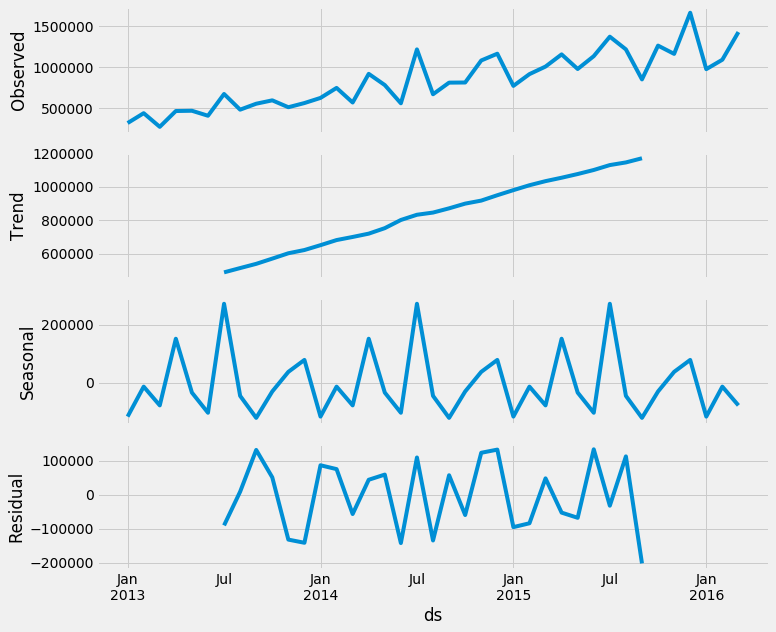

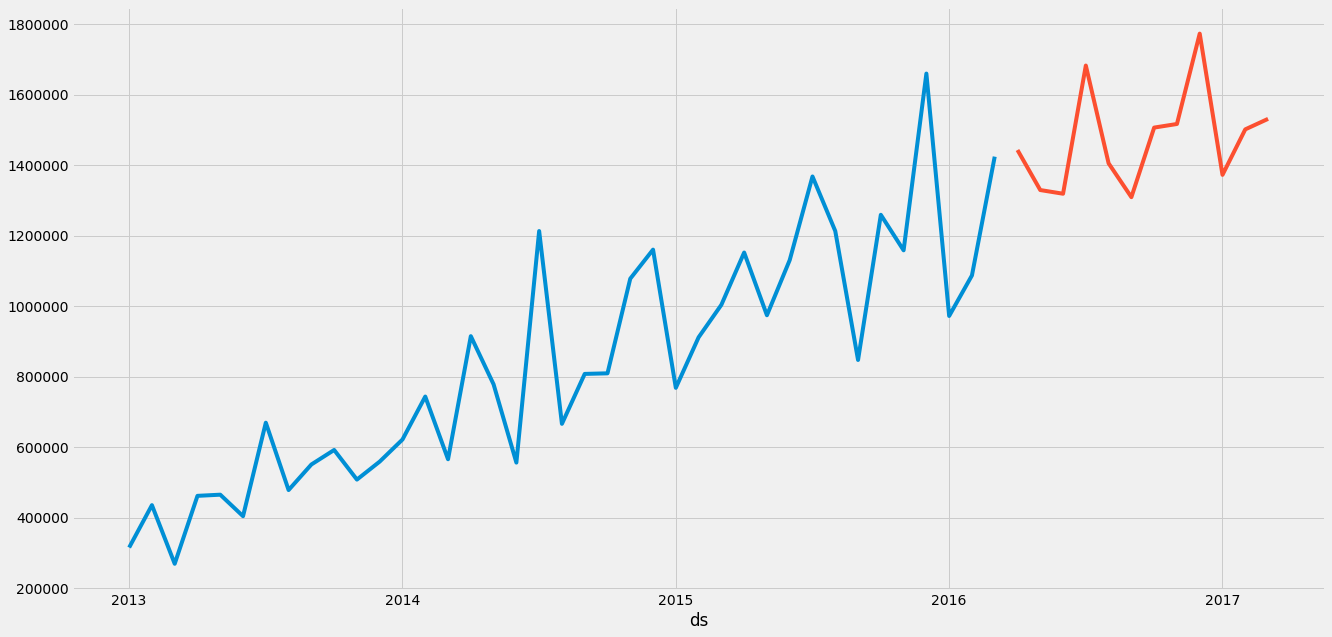

Product_ID :  3    Country :  Argentina
Product_ID :  3    Country :  Argentina


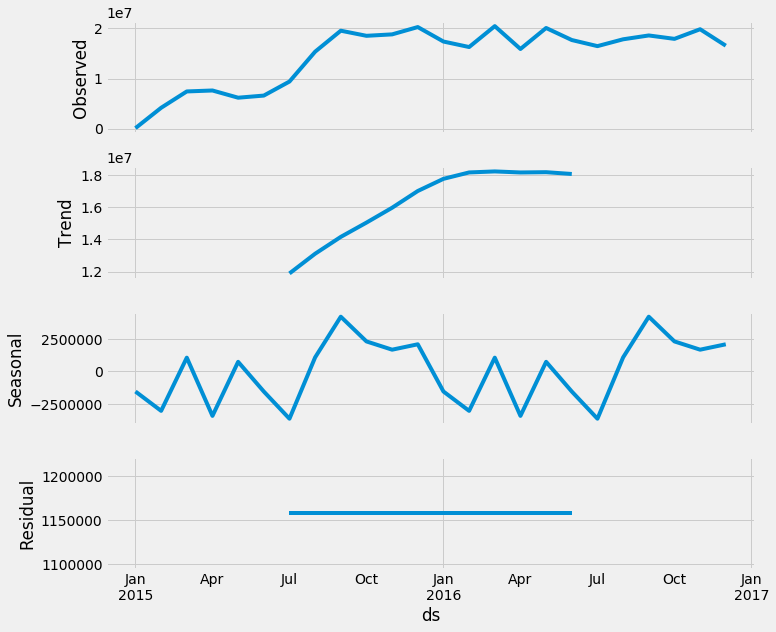

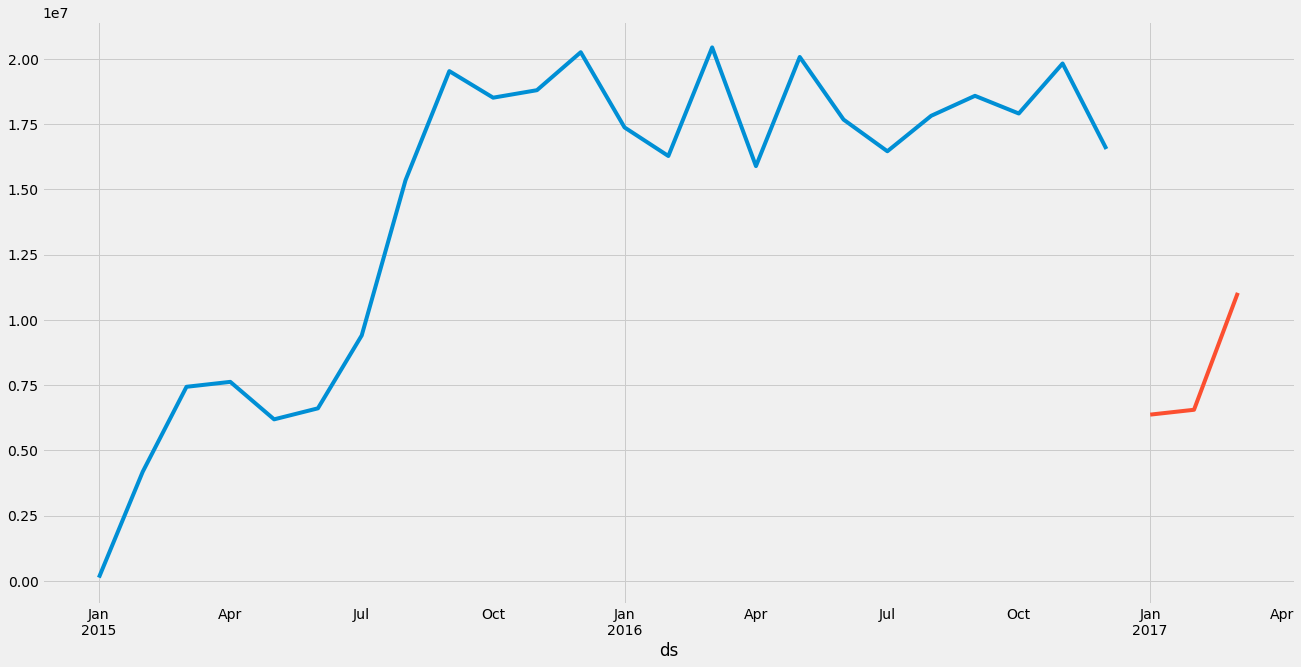

Product_ID :  3    Country :  Columbia
Product_ID :  3    Country :  Columbia


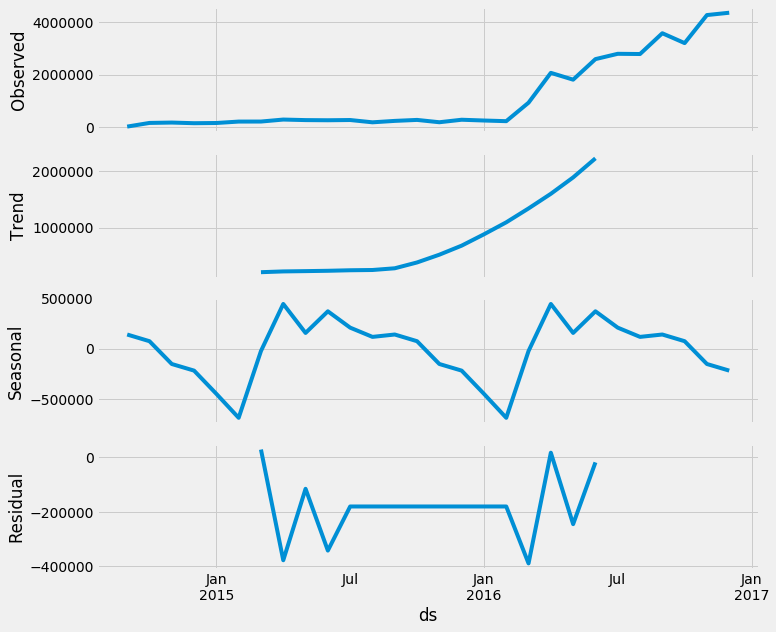

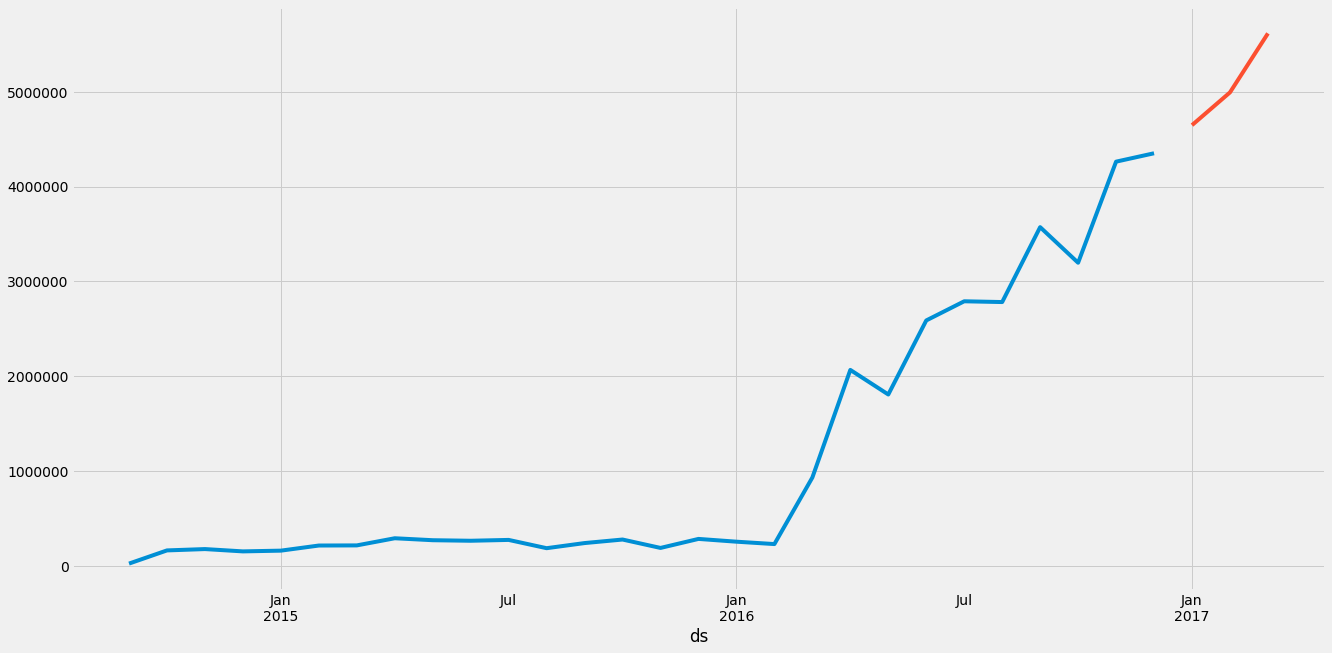

Product_ID :  4    Country :  England
Product_ID :  4    Country :  England


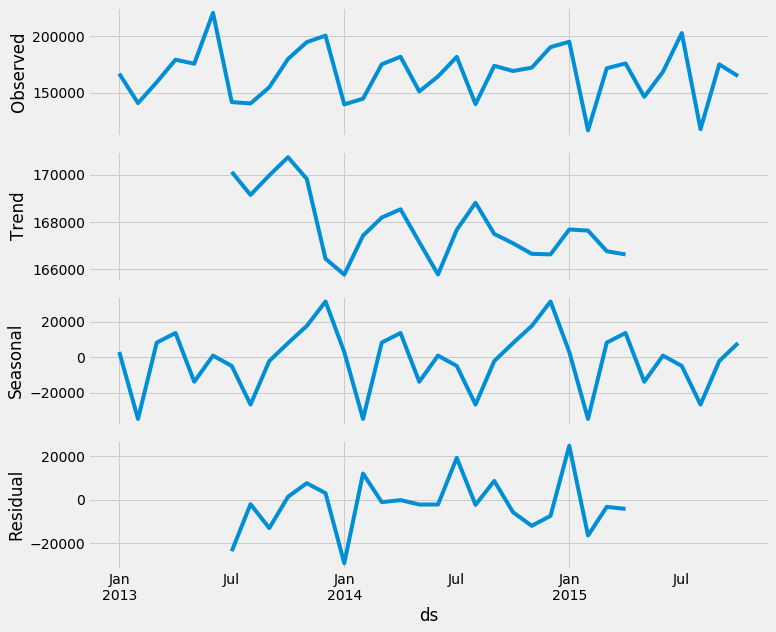

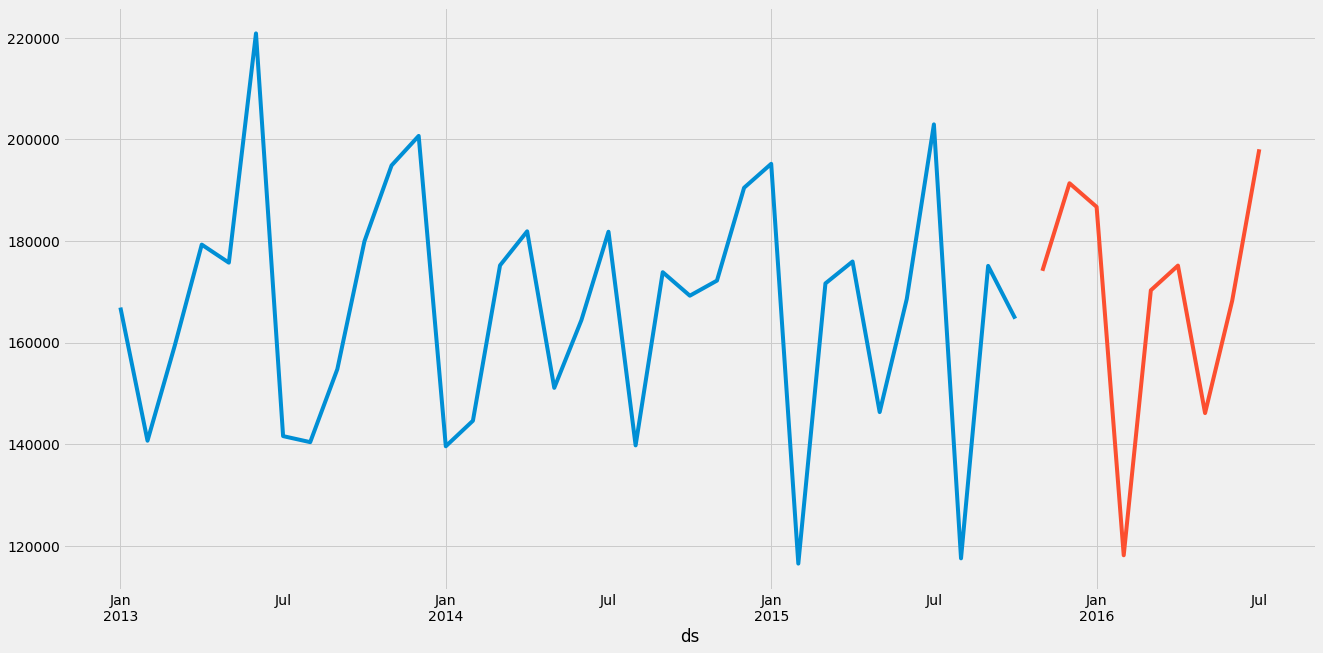

Product_ID :  4    Country :  Finland
Product_ID :  4    Country :  Finland


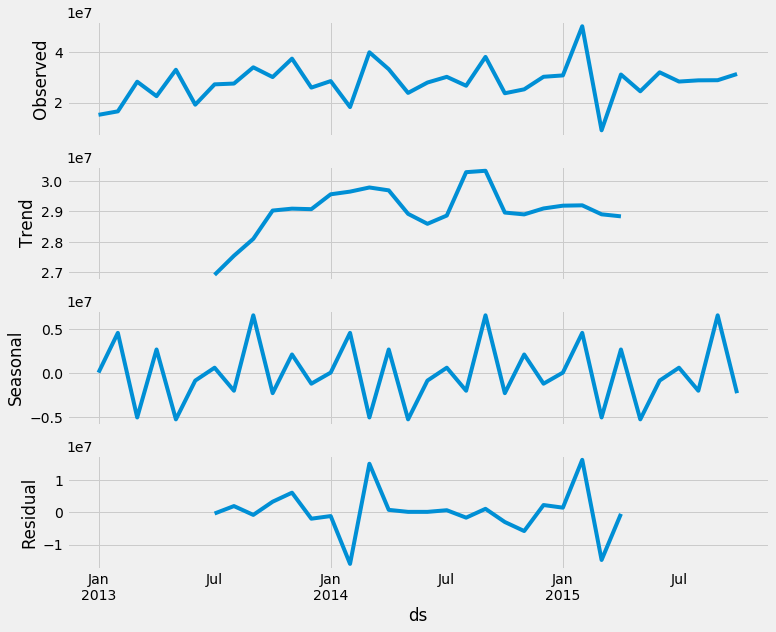

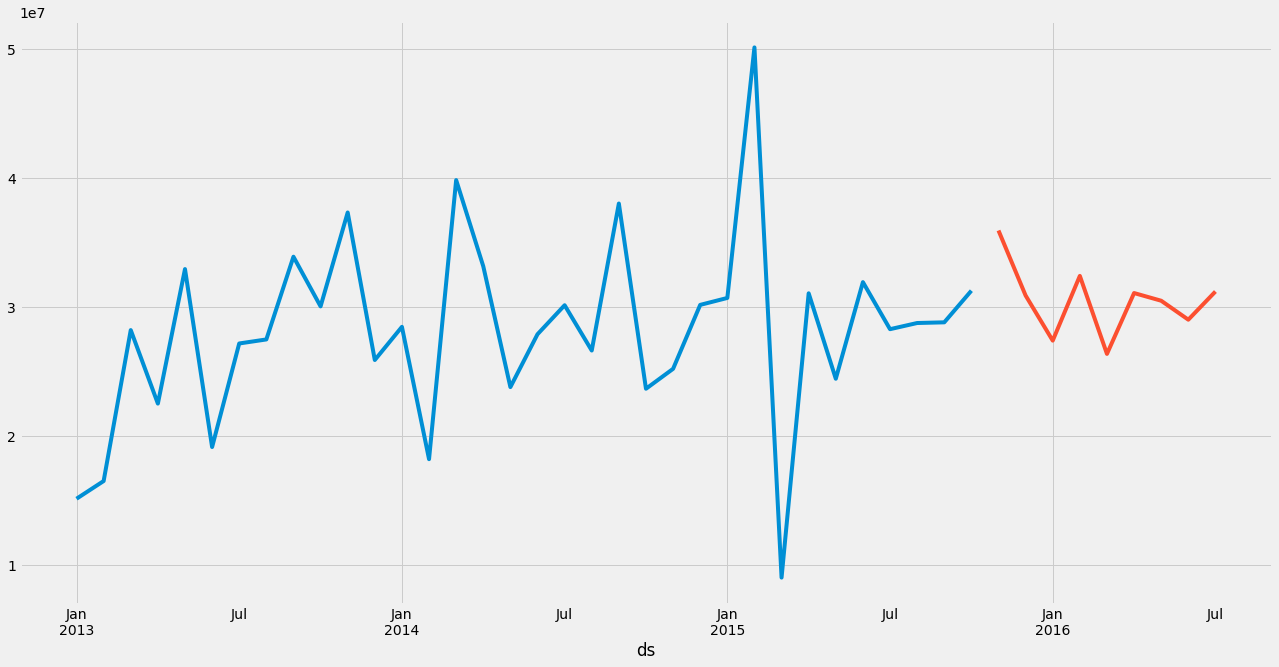

Product_ID :  5    Country :  England
Product_ID :  5    Country :  England


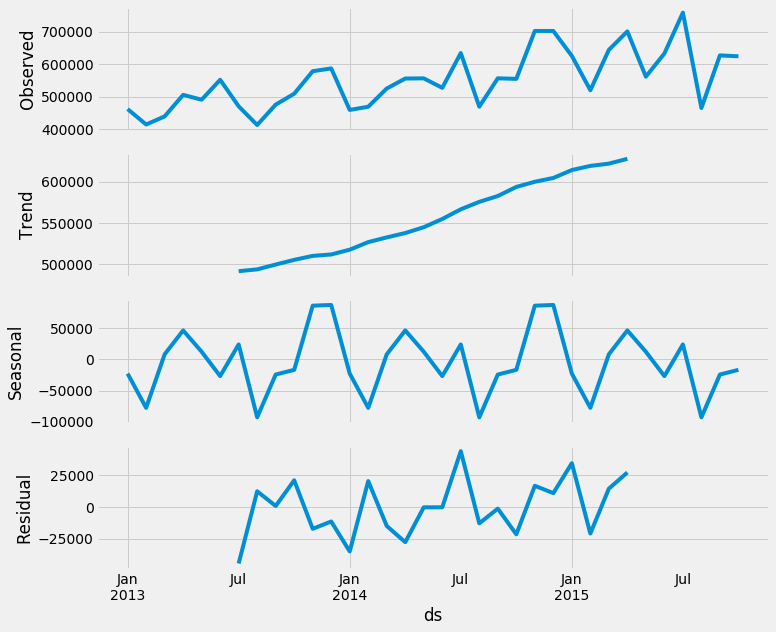

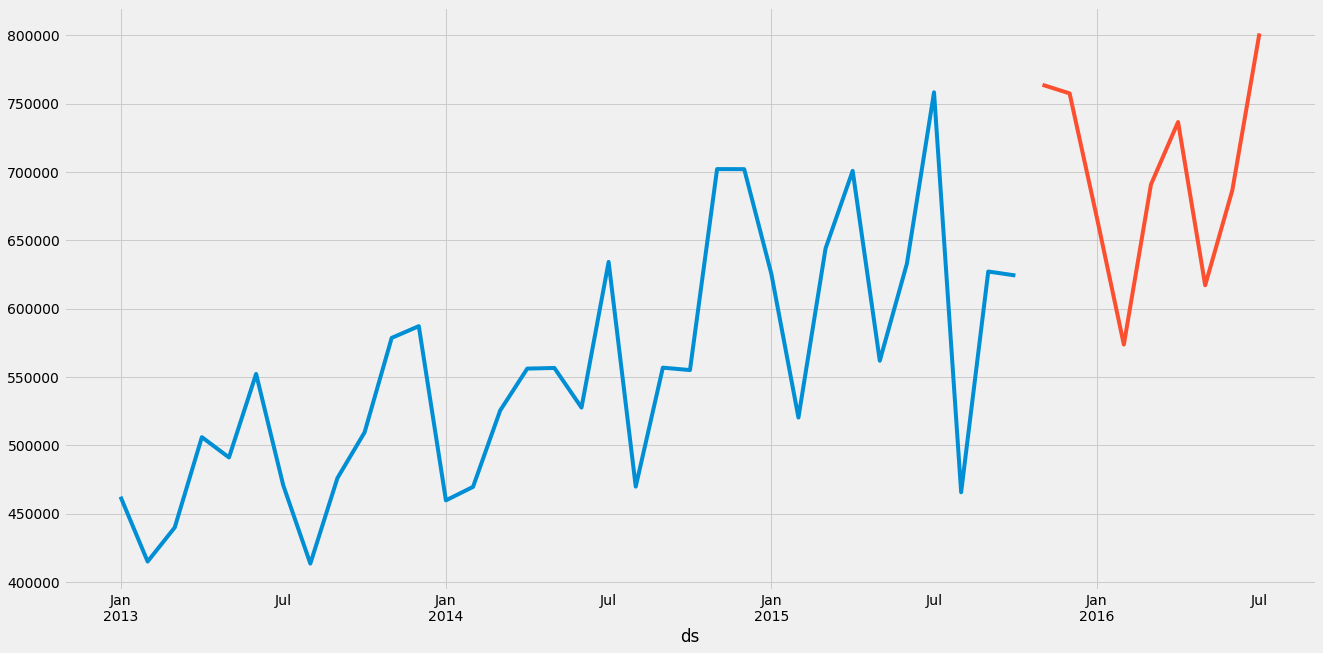

In [139]:
print('=================================================================================================')
print('=================================================================================================')
for i in range(1,len(set(train_visual['Product_ID']))+1):
    tmp = list(set(train_visual[train_visual['Product_ID']==i]['Country']))
    for j in tmp:
        print('Product_ID : ',i,'  ','Country : ',j)
        investigate(i=i,j=j)
        print('=================================================================================================')
        print('=================================================================================================')

<h1>Holt Corrections with Arima</h1>

In [8]:
holt = pd.read_csv('holt_winters_best.csv')
arima = pd.read_csv('ARIMA_best_params.csv')

In [10]:
test_visual['Sales'] = arima['Sales']

In [17]:
holt[holt['S_No']==79097]

,S_No,Year,Month,Product_ID,Country,Sales
24,79097,2017,1,3,Argentina,17375400.0


In [16]:
for i in test_visual[(test_visual['Product_ID']==3) & (test_visual['Country']=='Argentina')]['S_No'].values:
    holt.loc[holt[holt['S_No']==i].index,'Sales'] = arima.loc[arima[arima['S_No']==i].index,'Sales']

In [18]:
holt.to_csv('holt_winters_best_correction.csv',index=False)

In [3]:
holt.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,14649924.76
1,79074,2016,5,1,Argentina,16244242.77
2,79075,2016,6,1,Argentina,17631621.80
3,79076,2016,7,1,Argentina,13912307.23
4,79077,2016,8,1,Argentina,10529398.95


In [4]:
arima_mean = pd.read_csv('ARIMA_holt_mean.csv')
holt_correction = pd.read_csv('holt_winters_best_correction.csv')
holts_winter = pd.read_csv('holt_winters_best.csv')
arima_best_param = pd.read_csv('ARIMA_best_params.csv')

In [5]:
arima_mean['Sales'] = (arima_mean['Sales']+
                       holt_correction['Sales']+
                       holts_winter['Sales']+
                       arima_best_param['Sales'])/4

In [6]:
arima_mean.to_csv('blend_1.csv',index=False)